# Quick Guide

In [18]:
# PUBLIC API
# get_ticker(tickers)
# get_trades(tickers)
# get_depth(tickers)

# PRIVATE API
# account = vipbtc.TradeAPI(key, secret)
# account.getInfo()                            
# account.transHistory()                       
# account.trade(ticker,ttype, amount, price)          
# account.tradeHistory()                       
# account.openOrders()                         
# account.cancelOrder(ticker,ttype, order_id)

# Self Define 
# buy((ticker,amount,price,target,stop_loss)
# sell(ticker,amount,price)
# get_balance()
# generate_wallet()

# Import Modules

In [19]:
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import math
import datetime as dt
import json
import time
import sys
import vipbtc
from IPython.display import clear_output

# Available API and Currencies

In [20]:
API=dict()
API["ticker"] = "https://vip.bitcoin.co.id/api/{}/ticker"
API["trades"] = "https://vip.bitcoin.co.id/api/{}/trades" 
API["depth"]  = "https://vip.bitcoin.co.id/api/{}/depth" 

Tickers=dict()
Tickers["Bitcoin"]          = "btc_idr"
Tickers["Bitcoin Cash"]     = "bch_idr"
Tickers["Bitcoin Gold"]     = "btg_idr"
Tickers["Ethereum"]         = "eth_idr"
Tickers["Ethereum Classic"] = "etc_idr"
Tickers["Litecoin"]         = "ltc_idr"
Tickers["Stellar Lumens"]   = "str_idr"
Tickers["Ripple"]           = "xrp_idr"
Tickers["Waves"]            = "waves_idr"
Tickers["NXT"]              = "nxt_idr"
Tickers["ZCoin"]            = "xzc_idr"

Currency=dict()
Currency["Bitcoin"]          = "btc"
Currency["Bitcoin Cash"]     = "bch"
Currency["Bitcoin Gold"]     = "btg"
Currency["Ethereum"]         = "eth"
Currency["Ethereum Classic"] = "etc"
Currency["Litecoin"]         = "ltc"
Currency["Stellar Lumens"]   = "str"
Currency["Ripple"]           = "xrp"
Currency["Waves"]            = "waves"
Currency["NXT"]              = "nxt"
Currency["ZCoin"]            = "xzc"

# Public API Wrapper

In [21]:
def get_ticker(currency):
    request=API["ticker"].format(Tickers[currency])
    raw_result=requests.get(request)
    result=pd.DataFrame.from_dict(raw_result.json(),orient="index")
    final_result=result.copy(deep=True)
    return final_result

def get_trades(currency):
    request=API["trades"].format(Tickers[currency])
    raw_result=requests.get(request)
    result=pd.DataFrame.from_dict(raw_result.json(),orient="columns")
    final_result=result.copy(deep=True)
    return final_result

def get_depth(currency):
    request=API["depth"].format(Tickers[currency])
    raw_result=requests.get(request)
    result=pd.DataFrame.from_dict(raw_result.json(),orient="columns")
    
    result["buy_price"]=np.nan
    result["buy_amount"]=np.nan
    result["sell_price"]=np.nan
    result["sell_amount"]=np.nan
    
    for i in result.index:
        result.set_value(i,"buy_price",result["buy"][i][0])
        result.set_value(i,"buy_amount",result["buy"][i][1])
        result.set_value(i,"sell_price",result["sell"][i][0])
        result.set_value(i,"sell_amount",result["sell"][i][1])
    
    final_result=result.drop(["buy","sell"],axis=1)
    return final_result

# Analyzer Functions

In [22]:
def buy(currency,amount_idr,target_pct,stop_loss_pct,wallet):
    best_price=get_currency_sell_price(currency)
    account.trade(Tickers[currency],Currency[currency],"buy", amount_idr, best_price)
    wallet.set_value(currency,"Buy Price",best_price)
    wallet.set_value(currency,"Target",best_price*(1+(target_pct/100)))
    wallet.set_value(currency,"Stop Loss",best_price*(1-(stop_loss_pct/100)))
    return wallet
    
def sell(currency,wallet):
    balance=get_balance()["Balance"][Currency[currency]]
    best_price=get_currency_buy_price(currency)
    account.trade(Tickers[currency],Currency[currency],"sell", balance, best_price )   
    wallet["Buy Price"][currency]=0
    wallet["Target"][currency]=0
    wallet["Stop Loss"][currency]=0
    return wallet

def get_balance():
    b=pd.DataFrame.from_dict(list(account.getInfo()["return"]["balance"].items()))
    b.index=list(account.getInfo()["return"]["balance"])
    b.drop([0],axis=1,inplace=True)
    b.columns=["Balance"]
    
    b_h=pd.DataFrame.from_dict(list(account.getInfo()["return"]["balance_hold"].items()))
    b_h.index=list(account.getInfo()["return"]["balance_hold"])
    b_h.drop([0],axis=1,inplace=True)
    b_h.columns=["Balance Hold"]
    
    return pd.concat([b,b_h],axis=1)

def profit(initial_balance):
    total_profit=[]
    
def get_price():
    prices={}
    data=pd.DataFrame(index=list(Currency),columns=["Price"])
    for c in list(Currency):
        data.set_value(c,"Price",float(get_ticker(c)["sell"]["ticker"]))
    return data

def get_currency_sell_price(currency):
    return get_depth(currency)["sell_price"][1]

def get_currency_buy_price(currency):
    return get_depth(currency)["buy_price"][1]

# Other Functions

In [23]:
def generate_wallet():
    wallet=pd.DataFrame(index=list(Currency),columns=["Stop Loss","Buy Price","Target"]) 
    wallet.fillna(0,inplace=True)
    return wallet

# Private API

In [24]:
# AVAILABLE METHOD
# account = vipbtc.TradeAPI(key, secret)
# account.getInfo()                            
# account.transHistory()                       
# account.trade(ticker,ttype, amount, price)          
# account.tradeHistory()                       
# account.openOrders()                         
# account.cancelOrder(ticker,ttype, order_id)

# Identity
key = "M6BIXMW8-ZHWCC9W5-UQNT8WFM-WQ4PCRE1-NS5FMWW2"
secret = "577544db081010004ce2d354a3dda84b91cb83781402c76182ecc8ea3c39d74d8bb0a9ae9c144fe3"

# Initialization

In [25]:
account = vipbtc.TradeAPI(key, secret)
wallet  = generate_wallet()

# Trading Bot

In [26]:
# Initialization
account         = vipbtc.TradeAPI(key, secret)
wallet          = generate_wallet()
target_currency = "Dogecoin"
target          = 0.75
stop_loss       = 0.75
hi_threshold    = 0.2
lo_threshold    = 0.2
investment=70000

In [ ]:
clear_output()
print("========================  STATUS  ========================")
print("  Initializing Bot")
print("==========================================================")
            
unchanged_balance=get_balance()["Balance"]["idr"]-investment
current_investment=get_balance()["Balance"]["idr"]-unchanged_balance

time.sleep(60)

clear_output()
print("========================  STATUS  ========================")
print("  Starting Bot")
print("==========================================================")

reference_price=get_currency_sell_price(target_currency)
buyed=True
sold_count=0
counter=-1
target_reached=0
stop_loss_reached=0
high_threshold=0
low_threshold=0
starting_time=dt.datetime.now()

wallet=buy(target_currency,current_investment,target,stop_loss,wallet)

current_investment_temp=get_balance()["Balance"]["idr"]-unchanged_balance
if(current_investment_temp>0):
    current_investment=current_investment_temp

while(True):
    counter+=1
    if not(buyed):
        if(get_currency_sell_price(target_currency)<=reference_price*(1-(lo_threshold/100))):
            wallet=buy(target_currency,current_investment,target,stop_loss,wallet)
            current_time=dt.datetime.now()
            dur=str(current_time-starting_time).split(":")
            low_threshold+=1
            clear_output()
            print("========================  STATUS  ========================")
            print("  BUYED")
            print("  Low Threshold Reached")
            print()
            print("  Current Investment      : Rp {}".format(current_investment))
            print()
            print("  Target Reached          : {}".format(target_reached))
            print("  Stop Loss Reached       : {}".format(stop_loss_reached))
            print()
            print("  High Threshold Reached  : {}".format(high_threshold))
            print("  Low Threshold Reached   : {}".format(low_threshold))
            print()                  
            print("  Duration                : {} Hours {} Minutes {} Seconds".format(dur[0],dur[1],dur[2][:2]))
            print("==========================================================")
            print()
            buyed=True
        
        elif(get_currency_sell_price(target_currency)>=reference_price*(1+(hi_threshold/100))):
            wallet=buy(target_currency,current_investment,target,stop_loss,wallet)
            current_time=dt.datetime.now()
            dur=str(current_time-starting_time).split(":")
            high_threshold+=1
            clear_output()
            print("========================  STATUS  ========================")
            print("  BUYED")
            print("  High Threshold Reached")
            print()
            print("  Current Investment      : Rp {}".format(current_investment))
            print()
            print("  Target Reached          : {}".format(target_reached))
            print("  Stop Loss Reached       : {}".format(stop_loss_reached))
            print()
            print("  High Threshold Reached  : {}".format(high_threshold))
            print("  Low Threshold Reached   : {}".format(low_threshold))
            print()
            print("  Duration                : {} Hours {} Minutes {} Seconds".format(dur[0],dur[1],dur[2][:2]))
            print("==========================================================")
            print()
            buyed=True
            
    if(buyed):
        while(True):    
            counter+=1
            if(get_currency_buy_price(target_currency)>=wallet["Target"][target_currency]):
                wallet=sell(target_currency,wallet)
                reference_price=get_currency_sell_price(target_currency)
                current_time=dt.datetime.now()
                dur=str(current_time-starting_time).split(":")
                clear_output()
                target_reached+=1
                buyed=False
                current_investment=get_balance()["Balance"]["idr"]-unchanged_balance
                sold_count+=1
                print("========================  STATUS  ========================")
                print("  SOLD")
                print("  Target Price Reached")
                print()
                print("  Current Investment      : Rp {}".format(current_investment))
                print()
                print("  Target Reached          : {}".format(target_reached))
                print("  Stop Loss Reached       : {}".format(stop_loss_reached))
                print()
                print("  High Threshold Reached  : {}".format(high_threshold))
                print("  Low Threshold Reached   : {}".format(low_threshold))
                print()
                print("  Duration                : {} Hours {} Minutes {} Seconds".format(dur[0],dur[1],dur[2][:2]))
                print("==========================================================")
                print()

                break
                
            elif(get_currency_buy_price(target_currency)<=wallet["Stop Loss"][target_currency]):
                wallet=sell(target_currency,wallet)
                reference_price=get_currency_sell_price(target_currency)
                current_time=dt.datetime.now()
                dur=str(current_time-starting_time).split(":")
                clear_output()
                stop_loss_reached+=1
                buyed=False
                current_investment=get_balance()["Balance"]["idr"]-unchanged_balance
                sold_count+=1
                
                print("========================  STATUS  ========================")
                print("  SOLD")
                print("  Stop Loss Price Reached")
                print()
                print("  Current Investment      : Rp {}".format(current_investment))
                print()
                print("  Target Reached          : {}".format(target_reached))
                print("  Stop Loss Reached       : {}".format(stop_loss_reached))
                print()
                print("  High Threshold Reached  : {}".format(high_threshold))
                print("  Low Threshold Reached   : {}".format(low_threshold))
                print()
                print("  Duration                : {} Hours {} Minutes {} Seconds".format(dur[0],dur[1],dur[2][:2]))
                print("==========================================================")
                print()

                break
            
            if(counter%7==0):
                current_time=dt.datetime.now()
                dur=str(current_time-starting_time).split(":")
                clear_output()
                print("========================  STATUS  ========================")
                print("  Current Investment      : Rp {}".format(current_investment))
                print("  Buy Price               : Rp {}".format(wallet["Buy Price"][target_currency]))
                print()
                print("  Target                  : Rp {}".format(wallet["Target"][target_currency]))
                print("  Current Price           : Rp {}".format(get_currency_buy_price(target_currency)))
                print("  Stop Loss               : Rp {}".format(wallet["Stop Loss"][target_currency]))
                print()
                print("  Target Reached          : {}".format(target_reached))
                print("  Stop Loss Reached       : {}".format(stop_loss_reached))
                print()
                print("  High Threshold Reached  : {}".format(high_threshold))
                print("  Low Threshold Reached   : {}".format(low_threshold))
                print()
                print("  Duration                : {} Hours {} Minutes {} Seconds".format(dur[0],dur[1],dur[2][:2]))
                print("  Waiting For Sell Signal")
                print("==========================================================")
                print()
                counter=0
            time.sleep(3)
    
    if(counter%7==0):
        current_time=dt.datetime.now()
        dur=str(current_time-starting_time).split(":")
        clear_output()
        print("========================  STATUS  ========================")
        print("  Current Investment      : Rp {}".format(current_investment))
        print()
        print("  High Threshold          : Rp {}".format(reference_price*1.005))
        print("  Current Price           : Rp {}".format(get_currency_sell_price(target_currency)))
        print("  Low Threshold           : Rp {}".format(reference_price*0.995))
        print()
        print("  Target Reached          : {}".format(target_reached))
        print("  Stop Loss Reached       : {}".format(stop_loss_reached))
        print()
        print("  High Threshold Reached  : {}".format(high_threshold))
        print("  Low Threshold Reached   : {}".format(low_threshold))
        print()
        print("  Duration                : {} Hours {} Minutes {} Seconds".format(dur[0],dur[1],dur[2][:2]))
        print("  Waiting For Buy Signal")
        print("==========================================================")
        print()
        counter=0
    
    if(target_reached>=5 or stop_loss_reached>=5):
        break
        
    time.sleep(3)

current_time=dt.datetime.now()
dur=str(current_time-starting_time).split(":")
clear_output()
print("===========================  STATUS  =====================")
print("  ENDED")
print("  Target Reached          : {}".format(target_reached))
print("  Stop Loss Reached       : {}".format(stop_loss_reached))
print()
print("  High Threshold Reached  : {}".format(high_threshold))
print("  Low Threshold Reached   : {}".format(low_threshold))
print()
print("  Initial Investment      : Rp {}".format(investment))
print("  Current Investment      : Rp {}".format(current_investment))
print("  Revenue                 : Rp {}".format(current_investment-investment))
print("  Percentage Change       : {} %".format(100*(current_investment-investment)/investment))
print()
print("  Duration                : {} Hours {} Minutes {} Seconds".format(dur[0],dur[1],dur[2][:2]))
print("==========================================================")
print()

========================  STATUS  ========================
  Initializing Bot


In [27]:
temp=get_depth("Stellar Lumens")
total_buy=0
total_sell=0
for i in temp.index[:9]:
    total_buy+=temp["buy_price"][i]*temp["buy_amount"][i]
    total_sell+=temp["sell_price"][i]*temp["sell_amount"][i]
total_buy_amount=np.sum(temp[:9]["buy_amount"])
total_sell_amount=np.sum(temp[:9]["sell_amount"])

print(total_buy/total_buy_amount)
print(get_currency_buy_price("Stellar Lumens"))
print(get_currency_sell_price("Stellar Lumens"))
print(total_sell/total_sell_amount)

10629.5576897
10634.0
10686.0
10724.8710861


In [16]:
data_1=[]
data_2=[]
data_3=[]
data_4=[]
data_5=[]
data_6=[]
for i in range(100):
    temp=get_depth("Stellar Lumens")
    total_buy=0
    total_sell=0
    for i in temp.index[:5]:
        total_buy+=temp["buy_price"][i]*temp["buy_amount"][i]
        total_sell+=temp["sell_price"][i]*temp["sell_amount"][i]
    total_buy_amount=np.sum(temp[:5]["buy_amount"])
    total_sell_amount=np.sum(temp[:5]["sell_amount"])
    
    b=get_currency_buy_price("Stellar Lumens")
    s=get_currency_sell_price("Stellar Lumens")
    
    data_1.append(total_buy/total_buy_amount)
    data_2.append(b)
    data_3.append(s)
    data_4.append(total_sell/total_sell_amount)
    data_5.append((b+s)/2)
    data_6.append(((total_buy/total_buy_amount)+(total_sell/total_sell_amount))/2)
    time.sleep(10)

plt.plot(data_1,label="Buy AVG",color="r")
plt.plot(data_2,label="Buy",color="g")
plt.plot(data_3,label="Sell",color="g")
plt.plot(data_4,label="Sell AVG",color="r")
#plt.plot(data_5,label="Buy-Sell",color="b")
#plt.plot(data_6,label="Buy-Sell AVG",color="m")
plt.legend(loc='best')
plt.show()

ConnectionError: HTTPSConnectionPool(host='vip.bitcoin.co.id', port=443): Max retries exceeded with url: /api/str_idr/depth (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x0000000001242438>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed',))

Stellar Lumens
Max 10600
Min 10546
Step Change 0.05120424805613503


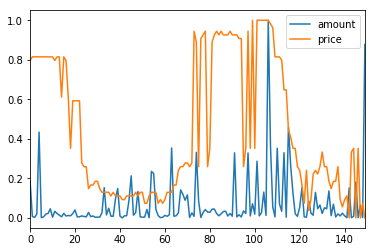

ZCoin
Max 1673200
Min 1650000
Step Change 0.1406060606060606


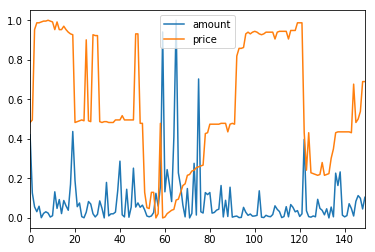

Ethereum Classic
Max 587900
Min 575100
Step Change 0.22256998782820378


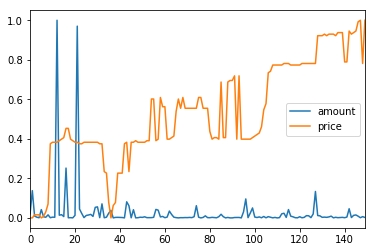

Litecoin
Max 4138000
Min 4068000
Step Change 0.1720747295968535


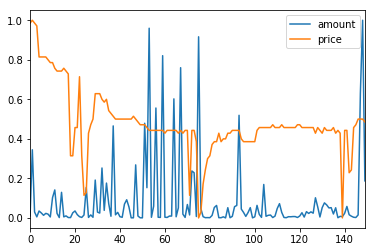

Bitcoin Cash
Max 39000000
Min 37729000
Step Change 0.3368761430199581


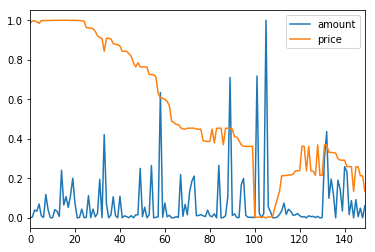

Waves
Max 194200
Min 190200
Step Change 0.2103049421661409


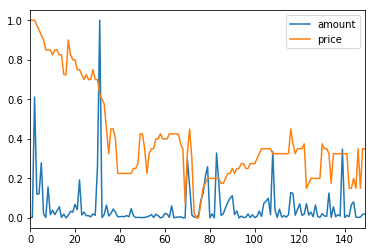

Bitcoin
Max 247498000
Min 246999000
Step Change 0.020202510941339843


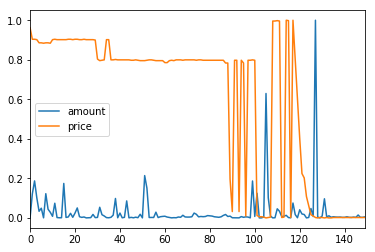

NXT
Max 8000
Min 7977
Step Change 0.028832894571894196


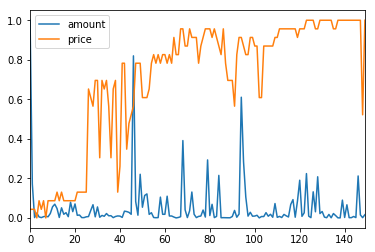

Ripple
Max 40300
Min 40200
Step Change 0.024875621890547265


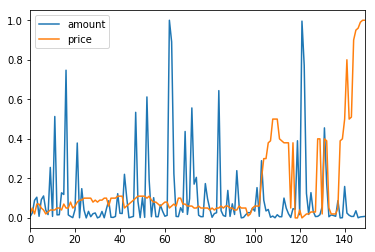

Ethereum
Max 19612000
Min 19350000
Step Change 0.13540051679586562


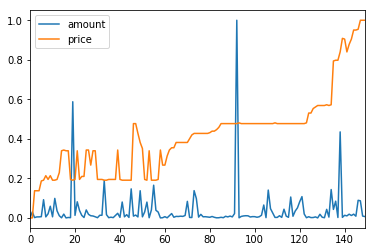

Bitcoin Gold
Max 3768000
Min 3723000
Step Change 0.12087026591458501


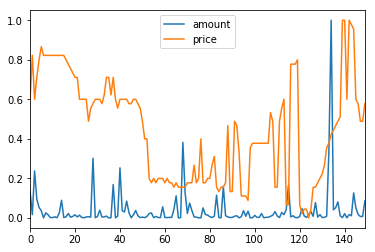

In [13]:
for currency in Currency:
    print(currency)
    temp=get_trades(currency)
    data_amount=pd.to_numeric(temp["amount"])
    data_price=pd.to_numeric(temp["price"])
    a_max=np.max(data_amount)
    a_min=np.min(data_amount)
    d1=pd.DataFrame((data_amount-a_min)/(a_max-a_min))
    p_max=np.max(data_price)
    p_min=np.min(data_price)
    print("Max {}".format(p_max))
    print("Min {}".format(p_min))
    print("Step Change {}".format((p_max-p_min)*10/p_min))
    d2=pd.DataFrame((data_price-p_min)/(p_max-p_min))
    d3=pd.concat([d1,d2],axis=1)
    d3.plot()
    plt.show()

Waves 1
Max 195000
Min 194000
Step Change 0.05154639175257732


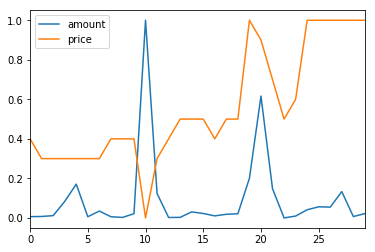

Waves 2
Max 195000
Min 193200
Step Change 0.09316770186335403


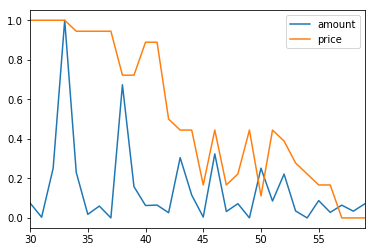

Waves 3
Max 193200
Min 192300
Step Change 0.046801872074883


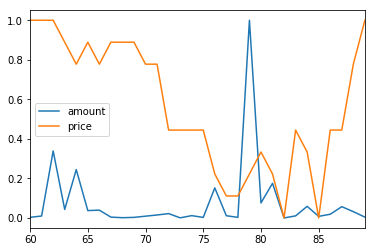

Waves 4
Max 195100
Min 193300
Step Change 0.09311950336264874


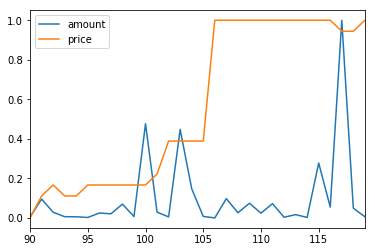

Waves 5
Max 195600
Min 194900
Step Change 0.03591585428424833


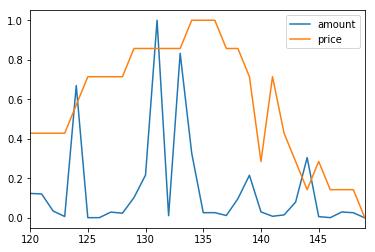

Waves Summary
First 1 : 1.0
Last  1 : 0.4
First 2 : 0.0
Last  2 : 1.0
First 3 : 1.0
Last  3 : 1.0
First 4 : 1.0
Last  4 : 0.0
First 5 : 0.0
Last  5 : 0.42857142857142855

Bitcoin Cash 1
Max 40359000
Min 40110000
Step Change 0.06207928197456993


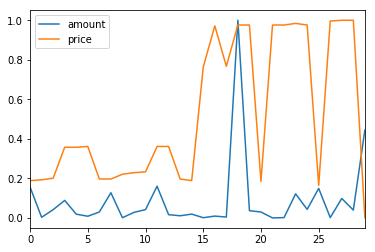

Bitcoin Cash 2
Max 40110000
Min 40002000
Step Change 0.026998650067496625


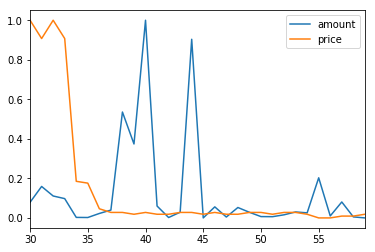

Bitcoin Cash 3
Max 40359000
Min 40000000
Step Change 0.08975


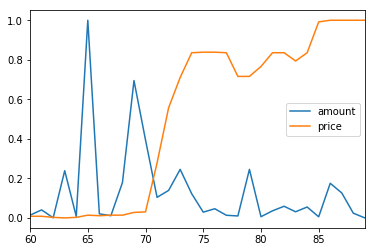

Bitcoin Cash 4
Max 40405000
Min 40299000
Step Change 0.02630338221792104


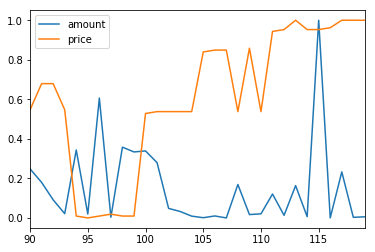

Bitcoin Cash 5
Max 40560000
Min 40400000
Step Change 0.039603960396039604


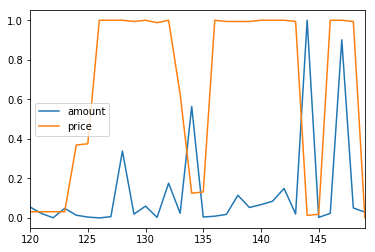

Bitcoin Cash Summary
First 1 : 0.0
Last  1 : 0.18875502008032127
First 2 : 0.018518518518518517
Last  2 : 1.0
First 3 : 1.0
Last  3 : 0.008356545961002786
First 4 : 1.0
Last  4 : 0.5471698113207547
First 5 : 0.0
Last  5 : 0.03125

Ripple 1
Max 39241
Min 39101
Step Change 0.03580471087695967


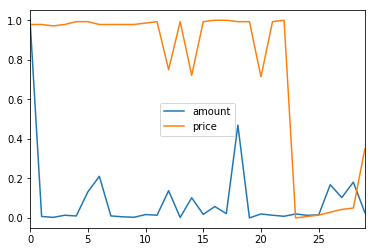

Ripple 2
Max 39300
Min 39099
Step Change 0.05140796439806645


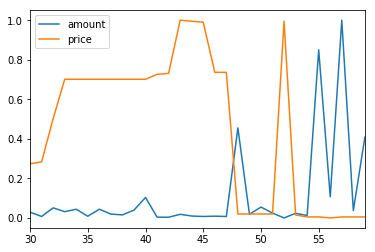

Ripple 3
Max 39100
Min 39100
Step Change 0.0


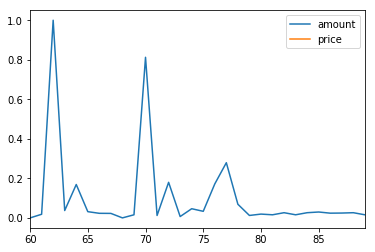

Ripple 4
Max 39100
Min 39099
Step Change 0.0002557610169058032


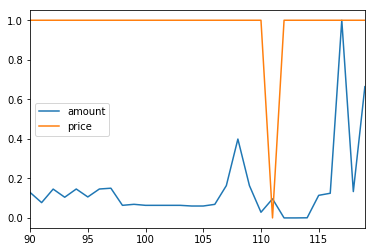

Ripple 5
Max 39100
Min 39086
Step Change 0.0035818451619505707


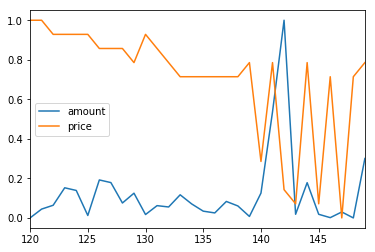

Ripple Summary
First 1 : 0.35
Last  1 : 0.9785714285714285
First 2 : 0.004975124378109453
Last  2 : 0.2736318407960199
First 3 : nan
Last  3 : nan
First 4 : 1.0
Last  4 : 1.0
First 5 : 0.7857142857142857
Last  5 : 1.0

Ethereum 1
Max 16057000
Min 15997000
Step Change 0.037507032568606616


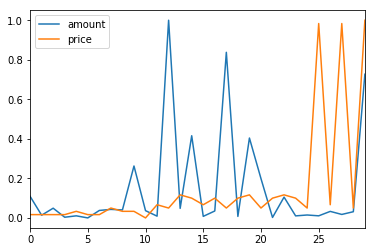

Ethereum 2
Max 16058000
Min 15852000
Step Change 0.12995205652283623


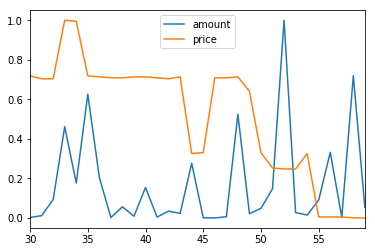

Ethereum 3
Max 15984000
Min 15852000
Step Change 0.08327024981074943


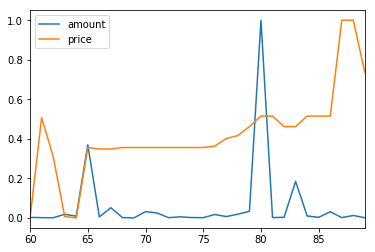

Ethereum 4
Max 16060000
Min 15913000
Step Change 0.09237730157732671


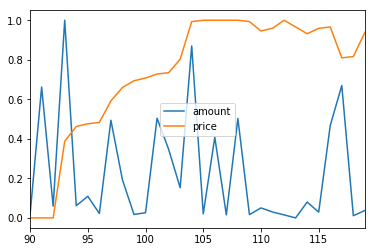

Ethereum 5
Max 16060000
Min 16016000
Step Change 0.027472527472527472


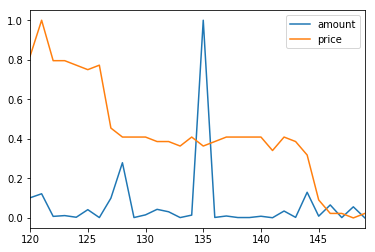

Ethereum Summary
First 1 : 1.0
Last  1 : 0.016666666666666666
First 2 : 0.0
Last  2 : 0.7184466019417476
First 3 : 0.7348484848484849
Last  3 : 0.0
First 4 : 0.9387755102040817
Last  4 : 0.0
First 5 : 0.022727272727272728
Last  5 : 0.8181818181818182

NXT 1
Max 8300
Min 8286
Step Change 0.016895969104513638


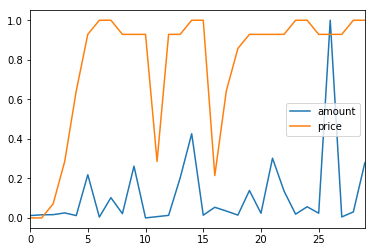

NXT 2
Max 8300
Min 8260
Step Change 0.048426150121065374


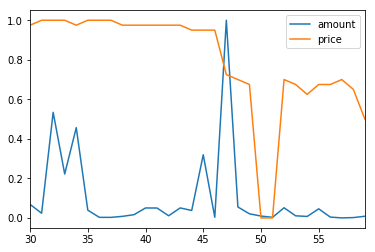

NXT 3
Max 8280
Min 8250
Step Change 0.03636363636363636


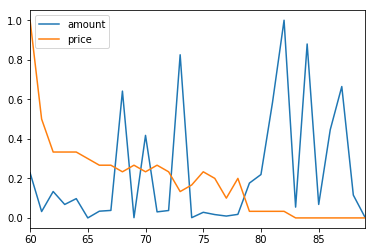

NXT 4
Max 8260
Min 8218
Step Change 0.05110732538330494


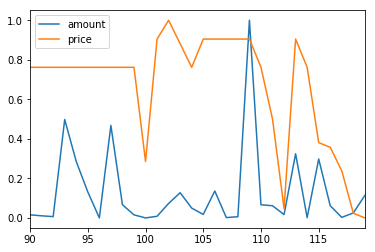

NXT 5
Max 8256
Min 8217
Step Change 0.04746257758305951


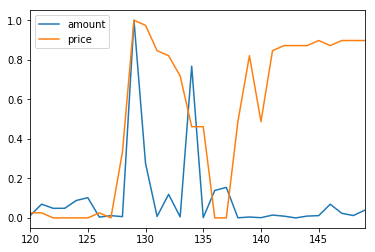

NXT Summary
First 1 : 1.0
Last  1 : 0.0
First 2 : 0.5
Last  2 : 0.975
First 3 : 0.0
Last  3 : 1.0
First 4 : 0.0
Last  4 : 0.7619047619047619
First 5 : 0.8974358974358975
Last  5 : 0.02564102564102564

Stellar Lumens 1
Max 10610
Min 10579
Step Change 0.029303336799319405


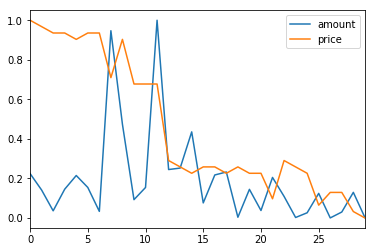

Stellar Lumens 2
Max 10585
Min 10579
Step Change 0.0056716135740618205


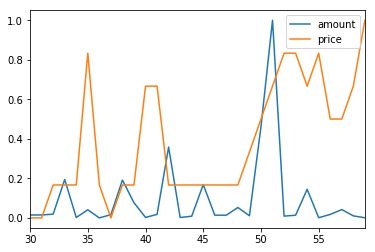

Stellar Lumens 3
Max 10587
Min 10579
Step Change 0.007562151432082428


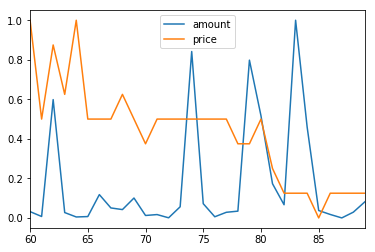

Stellar Lumens 4
Max 10588
Min 10579
Step Change 0.00850742036109273


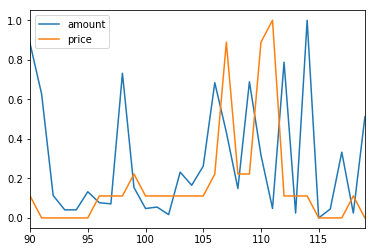

Stellar Lumens 5
Max 10600
Min 10580
Step Change 0.01890359168241966


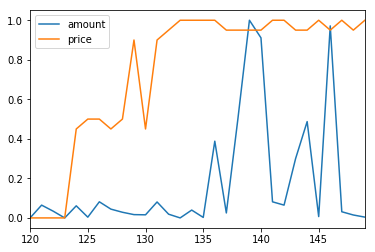

Stellar Lumens Summary
First 1 : 0.0
Last  1 : 1.0
First 2 : 1.0
Last  2 : 0.0
First 3 : 0.125
Last  3 : 1.0
First 4 : 0.0
Last  4 : 0.1111111111111111
First 5 : 1.0
Last  5 : 0.0

Bitcoin 1
Max 248507000
Min 248102000
Step Change 0.016323931286325786


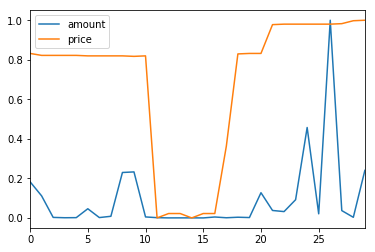

Bitcoin 2
Max 248687000
Min 248500000
Step Change 0.007525150905432596


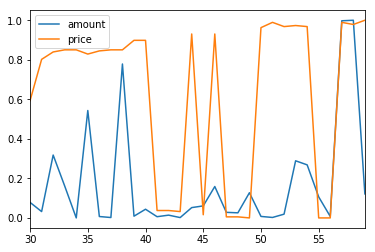

Bitcoin 3
Max 248785000
Min 248500000
Step Change 0.011468812877263581


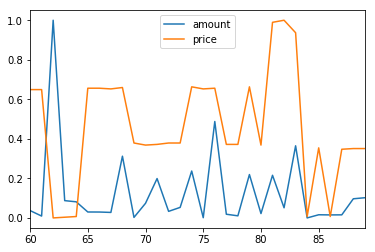

Bitcoin 4
Max 248793000
Min 248498000
Step Change 0.011871322908031452


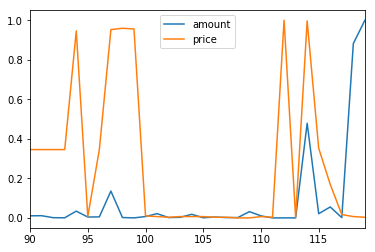

Bitcoin 5
Max 248500000
Min 248498000
Step Change 8.04835451391963e-05


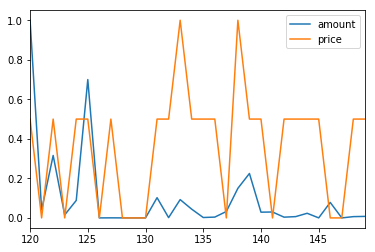

Bitcoin Summary
First 1 : 1.0
Last  1 : 0.8320987654320988
First 2 : 1.0
Last  2 : 0.5935828877005348
First 3 : 0.3508771929824561
Last  3 : 0.6491228070175439
First 4 : 0.003389830508474576
Last  4 : 0.34576271186440677
First 5 : 0.5
Last  5 : 0.5

Litecoin 1
Max 4200000
Min 4190000
Step Change 0.02386634844868735


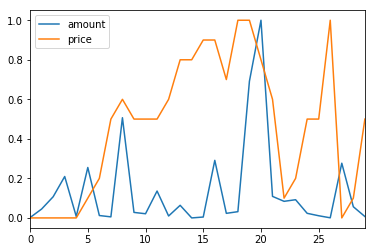

Litecoin 2
Max 4200000
Min 4180000
Step Change 0.04784688995215311


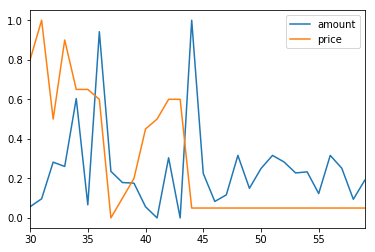

Litecoin 3
Max 4181000
Min 4160000
Step Change 0.05048076923076923


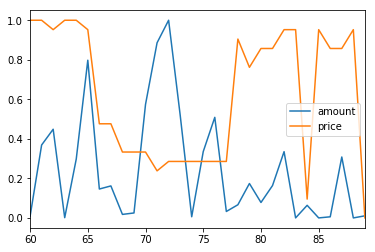

Litecoin 4
Max 4178000
Min 4149000
Step Change 0.06989636056881177


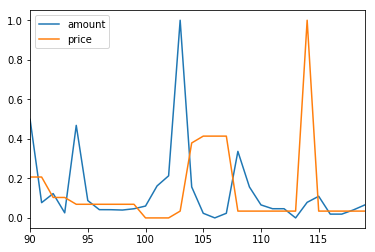

Litecoin 5
Max 4192000
Min 4150000
Step Change 0.10120481927710843


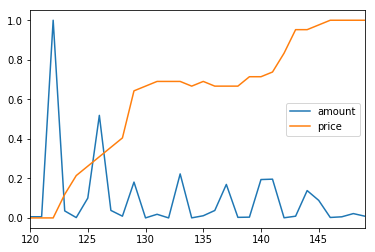

Litecoin Summary
First 1 : 0.5
Last  1 : 0.0
First 2 : 0.05
Last  2 : 0.8
First 3 : 0.0
Last  3 : 1.0
First 4 : 0.034482758620689655
Last  4 : 0.20689655172413793
First 5 : 1.0
Last  5 : 0.0

ZCoin 1
Max 1688600
Min 1673400
Step Change 0.09083303454045656


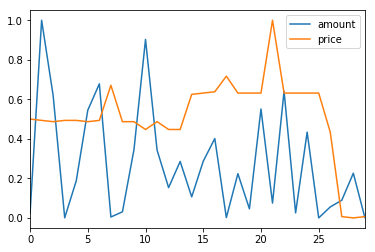

ZCoin 2
Max 1690200
Min 1673300
Step Change 0.10099802784916034


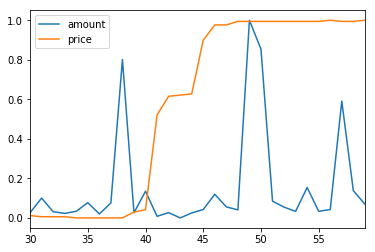

ZCoin 3
Max 1690100
Min 1656500
Step Change 0.2028373075762149


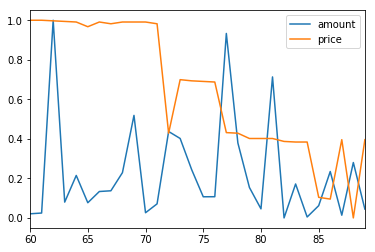

ZCoin 4
Max 1671000
Min 1655100
Step Change 0.09606670291825267


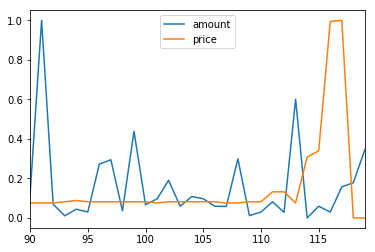

ZCoin 5
Max 1670900
Min 1655000
Step Change 0.09607250755287008


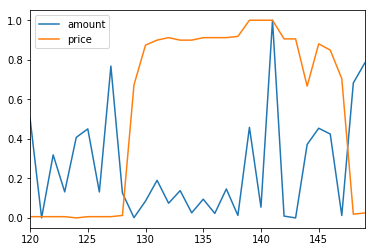

ZCoin Summary
First 1 : 0.006578947368421052
Last  1 : 0.5
First 2 : 1.0
Last  2 : 0.011834319526627219
First 3 : 0.3958333333333333
Last  3 : 1.0
First 4 : 0.0
Last  4 : 0.07547169811320754
First 5 : 0.025157232704402517
Last  5 : 0.006289308176100629

Ethereum Classic 1
Max 539000
Min 531000
Step Change 0.15065913370998116


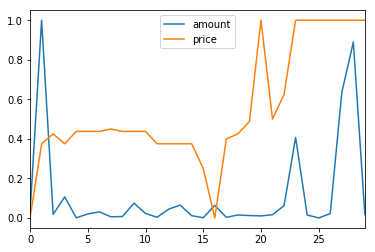

Ethereum Classic 2
Max 539900
Min 539000
Step Change 0.016697588126159554


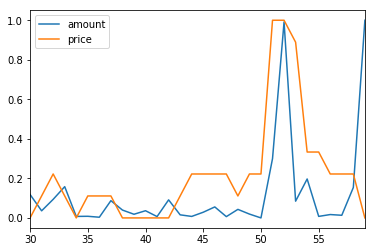

Ethereum Classic 3
Max 540000
Min 539000
Step Change 0.01855287569573284


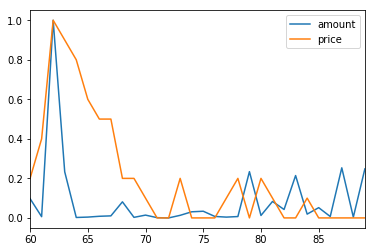

Ethereum Classic 4
Max 538800
Min 535000
Step Change 0.07102803738317758


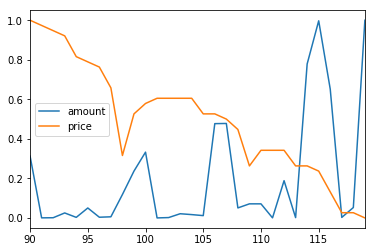

Ethereum Classic 5
Max 534600
Min 530000
Step Change 0.08679245283018867


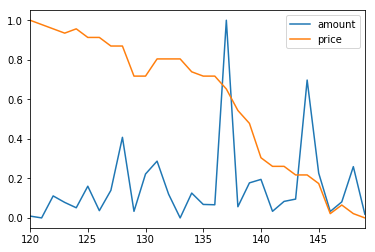

Ethereum Classic Summary
First 1 : 1.0
Last  1 : 0.0
First 2 : 0.0
Last  2 : 0.0
First 3 : 0.0
Last  3 : 0.2
First 4 : 0.0
Last  4 : 1.0
First 5 : 0.0
Last  5 : 1.0

Bitcoin Gold 1
Max 3877000
Min 3833000
Step Change 0.1147925906600574


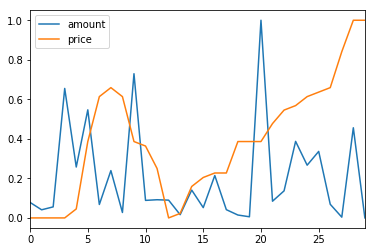

Bitcoin Gold 2
Max 3877000
Min 3855000
Step Change 0.057068741893644616


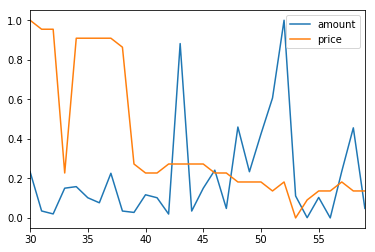

Bitcoin Gold 3
Max 3879000
Min 3855000
Step Change 0.0622568093385214


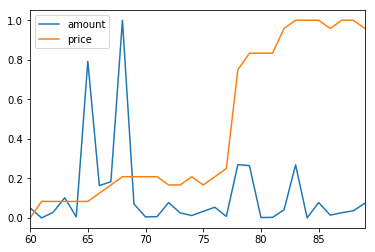

Bitcoin Gold 4
Max 3882000
Min 3856000
Step Change 0.06742738589211618


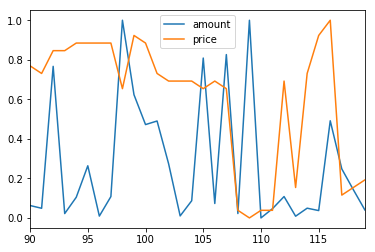

Bitcoin Gold 5
Max 3890000
Min 3869000
Step Change 0.054277591108813646


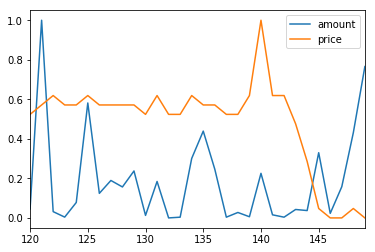

Bitcoin Gold Summary
First 1 : 1.0
Last  1 : 0.0
First 2 : 0.13636363636363635
Last  2 : 1.0
First 3 : 0.9583333333333334
Last  3 : 0.0
First 4 : 0.19230769230769232
Last  4 : 0.7692307692307693
First 5 : 0.0
Last  5 : 0.5238095238095238



In [148]:
N=5
increment=int(150/N)
for currency in Currency:
    last={}
    first={}
    for i in range(N):
        print(currency, i+1)
        temp=get_trades(currency)[(increment*i):(increment*i)+increment]
        data_amount=pd.to_numeric(temp["amount"])
        data_price=pd.to_numeric(temp["price"])
        a_max=np.max(data_amount)
        a_min=np.min(data_amount)
        d1=pd.DataFrame((data_amount-a_min)/(a_max-a_min))
        p_max=np.max(data_price)
        p_min=np.min(data_price)
        print("Max {}".format(p_max))
        print("Min {}".format(p_min))
        print("Step Change {}".format((p_max-p_min)*10/p_min))
        d2=pd.DataFrame((data_price-p_min)/(p_max-p_min))
        d3=pd.concat([d1,d2],axis=1)
        d3.plot()
        plt.show()
        last[i]=d2["price"][increment*i]
        first[i]=d2["price"][(increment*i)+increment-1]
    print("{} Summary".format(currency))
    for i in range(N):
        print("First {} : {}".format(i+1,first[i]))
        print("Last  {} : {}".format(i+1,last[i]))
    print()

In [150]:
first

{0: 1.0,
 1: 0.13636363636363635,
 2: 0.95833333333333337,
 3: 0.19230769230769232,
 4: 0.0}